In [ ]:
import pickle

import numpy as np

In [ ]:
with open('train_qa.txt','rb') as f:
  train_data = pickle.load(f)

In [ ]:
with open('test_qa.txt','rb') as f:
  test_data = pickle.load(f)

In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
len(train_data)

10000

In [ ]:
len(test_data)

1000

In [ ]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [ ]:
train_data[0][2]

'no'

In [ ]:
all_data = test_data + train_data

In [ ]:
len(all_data)

11000

In [ ]:
set((train_data[0][0]))

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [ ]:
vocab = set()

for story, question, answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [ ]:
vocab.add('no')

In [ ]:
vocab.add('yes')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_len = len(vocab)+1

In [ ]:
vocab_len

38

In [ ]:
# CLACULATING LONGEST STORY
all_story_lens = [len(data[0]) for data in all_data]

In [ ]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [ ]:
max(all_story_lens)

156

In [ ]:
max_story_len = max(all_story_lens)

In [ ]:
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(filters=[])

tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'.': 37,
 '?': 1,
 'apple': 3,
 'back': 18,
 'bathroom': 23,
 'bedroom': 12,
 'daniel': 19,
 'discarded': 4,
 'down': 29,
 'dropped': 34,
 'football': 36,
 'garden': 7,
 'got': 11,
 'grabbed': 15,
 'hallway': 26,
 'in': 2,
 'is': 32,
 'john': 9,
 'journeyed': 33,
 'kitchen': 27,
 'left': 25,
 'mary': 16,
 'milk': 17,
 'moved': 22,
 'no': 10,
 'office': 24,
 'picked': 14,
 'put': 20,
 'sandra': 6,
 'the': 35,
 'there': 28,
 'to': 8,
 'took': 13,
 'travelled': 21,
 'up': 5,
 'went': 30,
 'yes': 31}

In [ ]:
train_story_text =[]

train_question_text =[]

train_answers = []

In [ ]:
for story, question, answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [ ]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_seq)

10000

In [ ]:
len(train_story_text)

10000

In [ ]:
train_story_seq

[[16, 22, 8, 35, 23, 37, 6, 33, 8, 35, 12, 37],
 [16,
  22,
  8,
  35,
  23,
  37,
  6,
  33,
  8,
  35,
  12,
  37,
  16,
  30,
  18,
  8,
  35,
  12,
  37,
  19,
  30,
  18,
  8,
  35,
  26,
  37],
 [16,
  22,
  8,
  35,
  23,
  37,
  6,
  33,
  8,
  35,
  12,
  37,
  16,
  30,
  18,
  8,
  35,
  12,
  37,
  19,
  30,
  18,
  8,
  35,
  26,
  37,
  6,
  30,
  8,
  35,
  27,
  37,
  19,
  30,
  18,
  8,
  35,
  23,
  37],
 [16,
  22,
  8,
  35,
  23,
  37,
  6,
  33,
  8,
  35,
  12,
  37,
  16,
  30,
  18,
  8,
  35,
  12,
  37,
  19,
  30,
  18,
  8,
  35,
  26,
  37,
  6,
  30,
  8,
  35,
  27,
  37,
  19,
  30,
  18,
  8,
  35,
  23,
  37,
  19,
  14,
  5,
  35,
  36,
  28,
  37,
  19,
  30,
  8,
  35,
  12,
  37],
 [16,
  22,
  8,
  35,
  23,
  37,
  6,
  33,
  8,
  35,
  12,
  37,
  16,
  30,
  18,
  8,
  35,
  12,
  37,
  19,
  30,
  18,
  8,
  35,
  26,
  37,
  6,
  30,
  8,
  35,
  27,
  37,
  19,
  30,
  18,
  8,
  35,
  23,
  37,
  19,
  14,
  5,
  35,
  36,
  28,
  37,
  1

In [ ]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):

  X = []  #STORIE =X
  Xq = [] #QUESTIONS Xq
  Y = []  # Y CORRECT ANSWER (yes/no)

  for story, query, answer in data:
    
    # for each story
    #[23, 24, ...]
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]

    y = np.zeros(len(word_index) + 1)

    y[word_index[answer]] =1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return(pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len),np.array(Y))

In [ ]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [ ]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 35, 12, 37],
       [ 0,  0,  0, ..., 35,  7, 37],
       [ 0,  0,  0, ..., 35,  7, 37],
       ...,
       [ 0,  0,  0, ..., 35,  3, 37],
       [ 0,  0,  0, ..., 35,  7, 37],
       [ 0,  0,  0, ...,  3, 28, 37]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index['yes']

31

In [ ]:
tokenizer.word_index['no']

10

In [ ]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [ ]:
from keras.models import Sequential, Model

In [ ]:
from keras.layers.embeddings import Embedding

In [ ]:
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [ ]:
#PLACEHOLDER shape=(max_story_len, batch_size)

input_sequence = Input((max_story_len,))

question = Input((max_question_len,))

In [ ]:
#vocab_len
vocab_size = len(vocab) + 1

In [ ]:
#Input Encoder M

#input_encoder_m = Sequential()
#input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
#input_encoder_m.add(Dropout(0.3))

#OUTPUT
#(samples, story_maxlen,embedding_dim)

# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

In [ ]:
#INPUT ENCODER C

#input_encoder_c = Sequential()
#input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
#input_encoder_c.add(Dropout(0.3))

#OUTPUT
#(samples, story_maxlen,max_question_len)

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

In [ ]:
question_encoder= Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#(samples, query_maxlen, embedding_dim)

# embed the question into a sequence of vectors
# output: (samples, query_maxlen, embedding_dim)


In [ ]:
#ENCODED <------ ENCODER(INPUT)

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

# encode input sequence and questions (which are indices)
# to sequences of dense vectors


In [ ]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [ ]:
response =add([match, input_encoded_c])
response = Permute((2,1))(response)

In [ ]:
answer = concatenate([response, question_encoded])

In [ ]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
answer = LSTM(32)(answer)

In [ ]:
answer =Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) #(samples, vocab_size) #YES/NO 0000

In [ ]:
answer =Activation('softmax')(answer)

In [ ]:
model = Model([input_sequence, question], answer)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, None, 64)     2432        input_4[0][0]                    
__________________________________________________________________________________________________
sequential_11 (Sequential)      (None, 6, 64)        2432        input_5[0][0]                    
____________________________________________________________________________________________

In [ ]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=10, validation_data=([inputs_test, queries_test],answers_test))

Epoch 1/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6947 - accuracy: 0.5008 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 2/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6944 - accuracy: 0.4967 - val_loss: 0.6961 - val_accuracy: 0.4970
Epoch 3/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6939 - accuracy: 0.5069 - val_loss: 0.6940 - val_accuracy: 0.4900
Epoch 4/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6939 - accuracy: 0.5015 - val_loss: 0.6956 - val_accuracy: 0.4880
Epoch 5/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6925 - accuracy: 0.5108 - val_loss: 0.6978 - val_accuracy: 0.4860
Epoch 6/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6898 - accuracy: 0.5225 - val_loss: 0.6906 - val_accuracy: 0.5040
Epoch 7/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6770 - accuracy: 0.5689 - val_loss: 0.6657 - val_accuracy: 0.6280

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


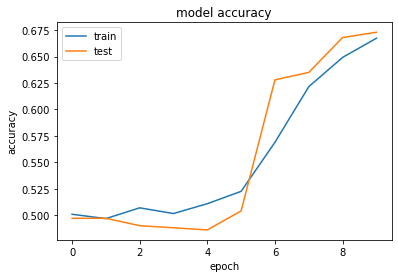

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('mybrandnewmodel.h5')

In [ ]:
model.load_weights('chatbot_10.h5')

In [ ]:
predicted_results = model.predict(([inputs_test, queries_test]))


In [ ]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
predicted_results.shape

(1000, 38)

In [ ]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [ ]:
test_data[0][2]

'no'

In [ ]:
predicted_results[0]

array([9.6712697e-16, 1.0702629e-15, 1.0045947e-15, 1.0288966e-15,
       1.2511544e-15, 9.5605286e-16, 9.9985003e-01, 1.3800287e-15,
       8.1028109e-16, 9.4954691e-16, 9.1960239e-16, 1.2409301e-15,
       1.0961827e-15, 1.0141011e-15, 8.4436411e-16, 1.1337352e-15,
       8.0819739e-16, 1.0007201e-15, 8.2027041e-16, 1.4992601e-04,
       9.2658512e-16, 1.0689899e-15, 8.6482959e-16, 1.1390672e-15,
       9.8383078e-16, 8.9510154e-16, 6.5849506e-16, 1.0265131e-15,
       8.5018830e-16, 1.0818383e-15, 1.0527821e-15, 9.0782154e-16,
       6.7623315e-16, 9.9769374e-16, 1.1014013e-15, 1.0791097e-15,
       7.5235208e-16, 1.2073476e-15], dtype=float32)

In [ ]:
val_max = np.argmax(predicted_results[0])

In [ ]:
for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'sandra'

In [ ]:
predicted_results[0][val_max]

0.99985003

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [ ]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [ ]:
my_question= "Is the football in the garden ?"

In [ ]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [ ]:
mydata = [(my_story.split(), my_question.split(), 'yes')]

In [ ]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [ ]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [ ]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0.]])

In [ ]:
predicted_results = model.predict(([my_story, my_ques]))

In [ ]:
val_max = np.argmax(predicted_results[0])

In [ ]:
for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'sandra'

In [ ]:
predicted_results[0][val_max]

0.98051363